Link To personal github reprository: https://github.com/PriyanshuPansari/ML-Project-Campus-Recruitment

In [244]:
#Importing datasets and modules 
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #plotting
import seaborn as sns #creating complex graphs

df = pd.read_csv("./datasets/Placement_Data_Full_Class.csv")

# About Data

# Data Analysis

In [245]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


## Correlation Matrix

<AxesSubplot:>

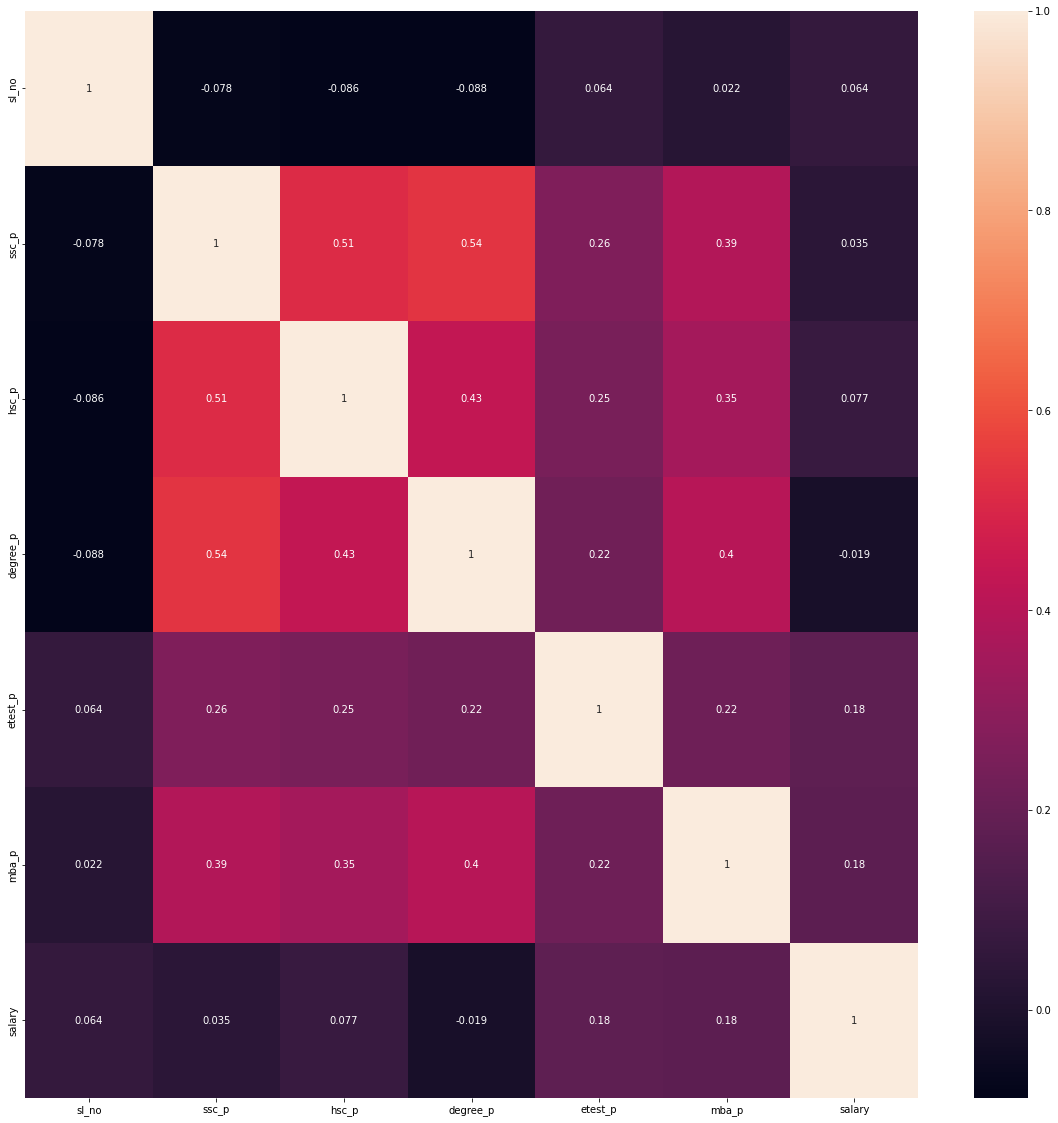

In [247]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

## Box-plots

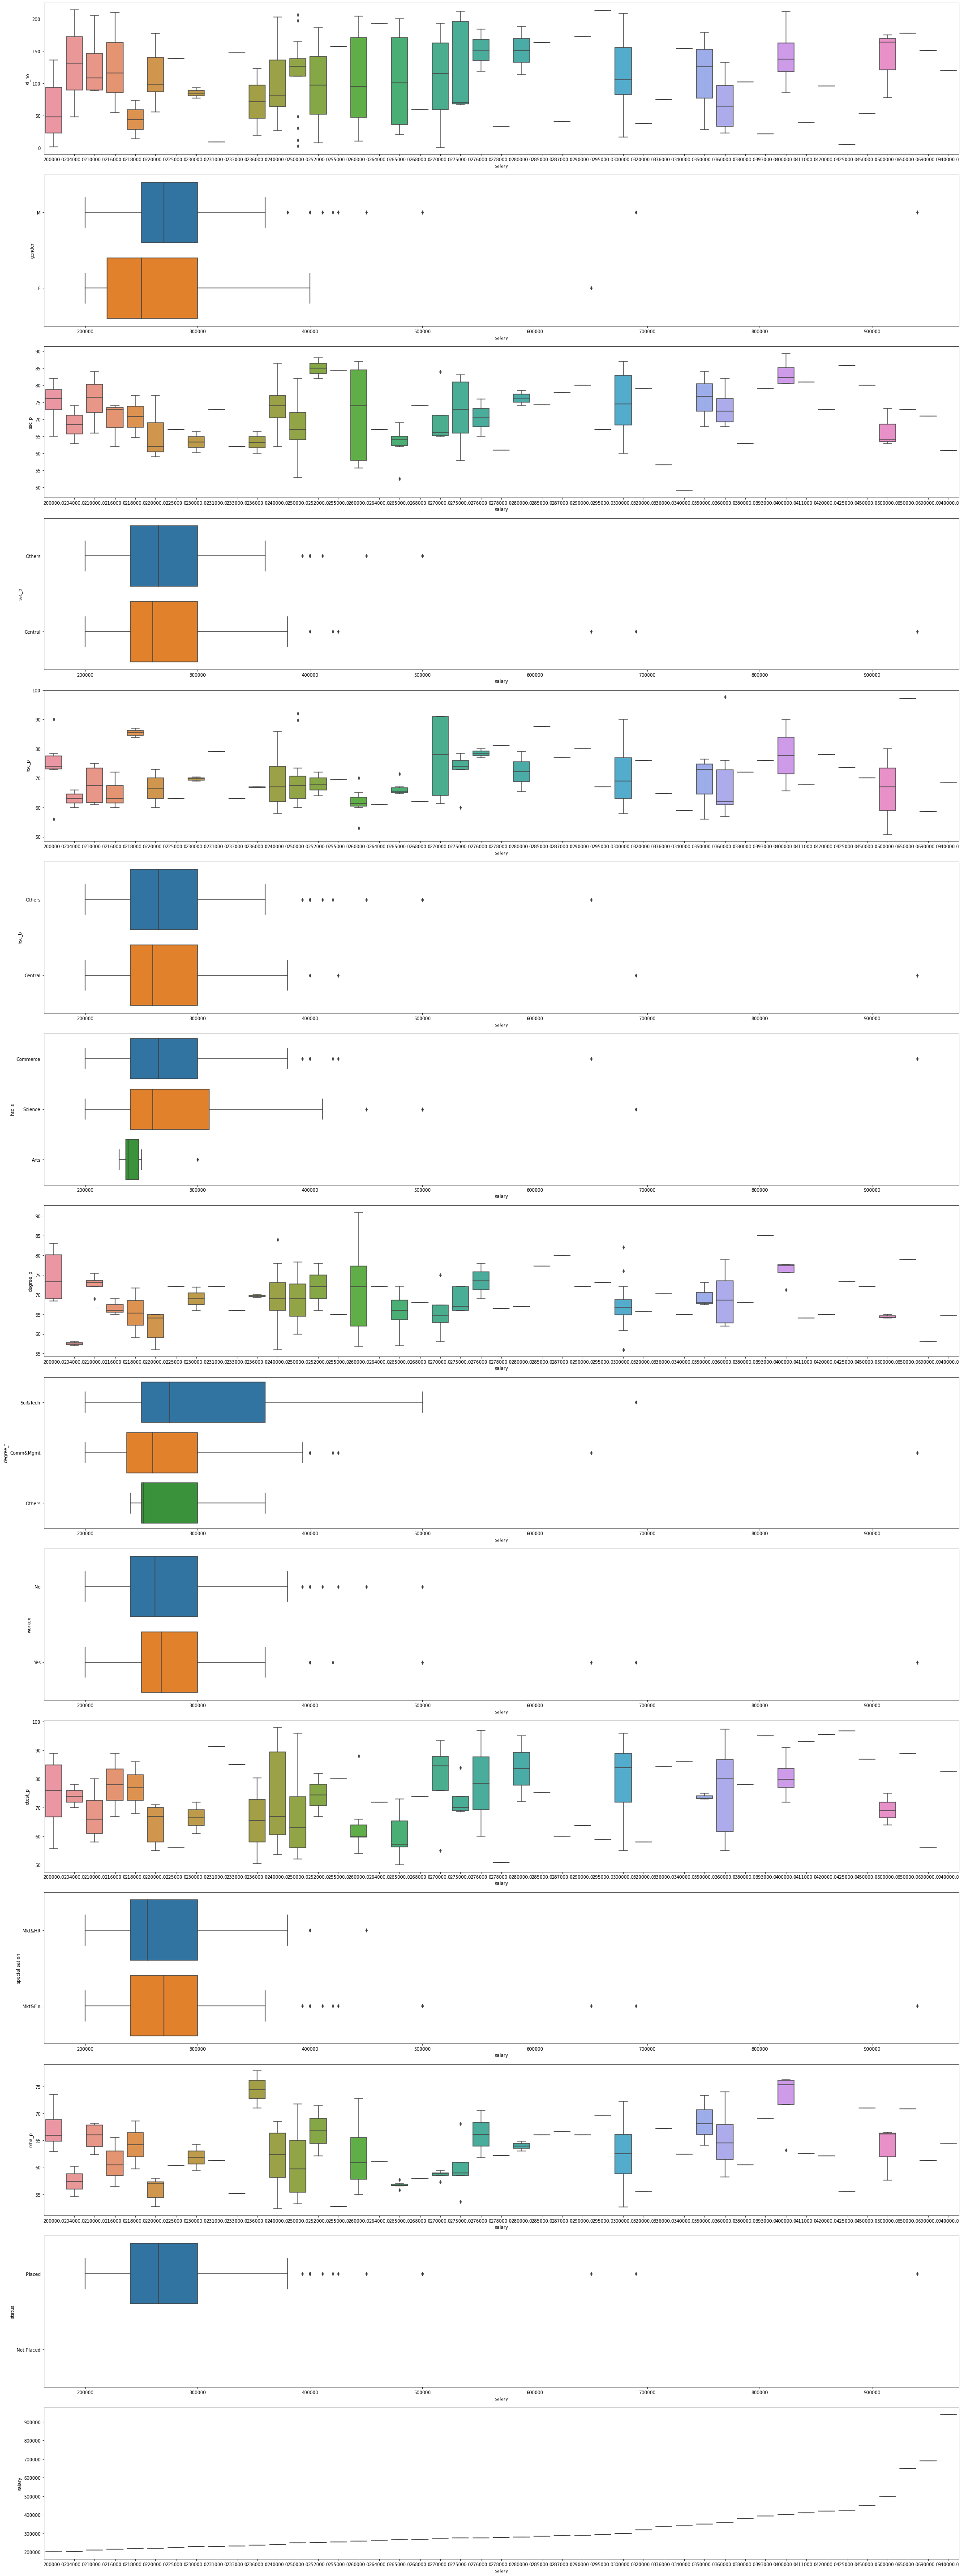

In [249]:
plt.figure(figsize=(30,80))
plt.subplots_adjust(hspace=0.5)
i=1
for col_name in df.columns:
    plt.subplot(15,1, i)
    sns.boxplot(data=df, x='salary', y=col_name)
    i+=1
plt.tight_layout()
plt.show()

## Histogram

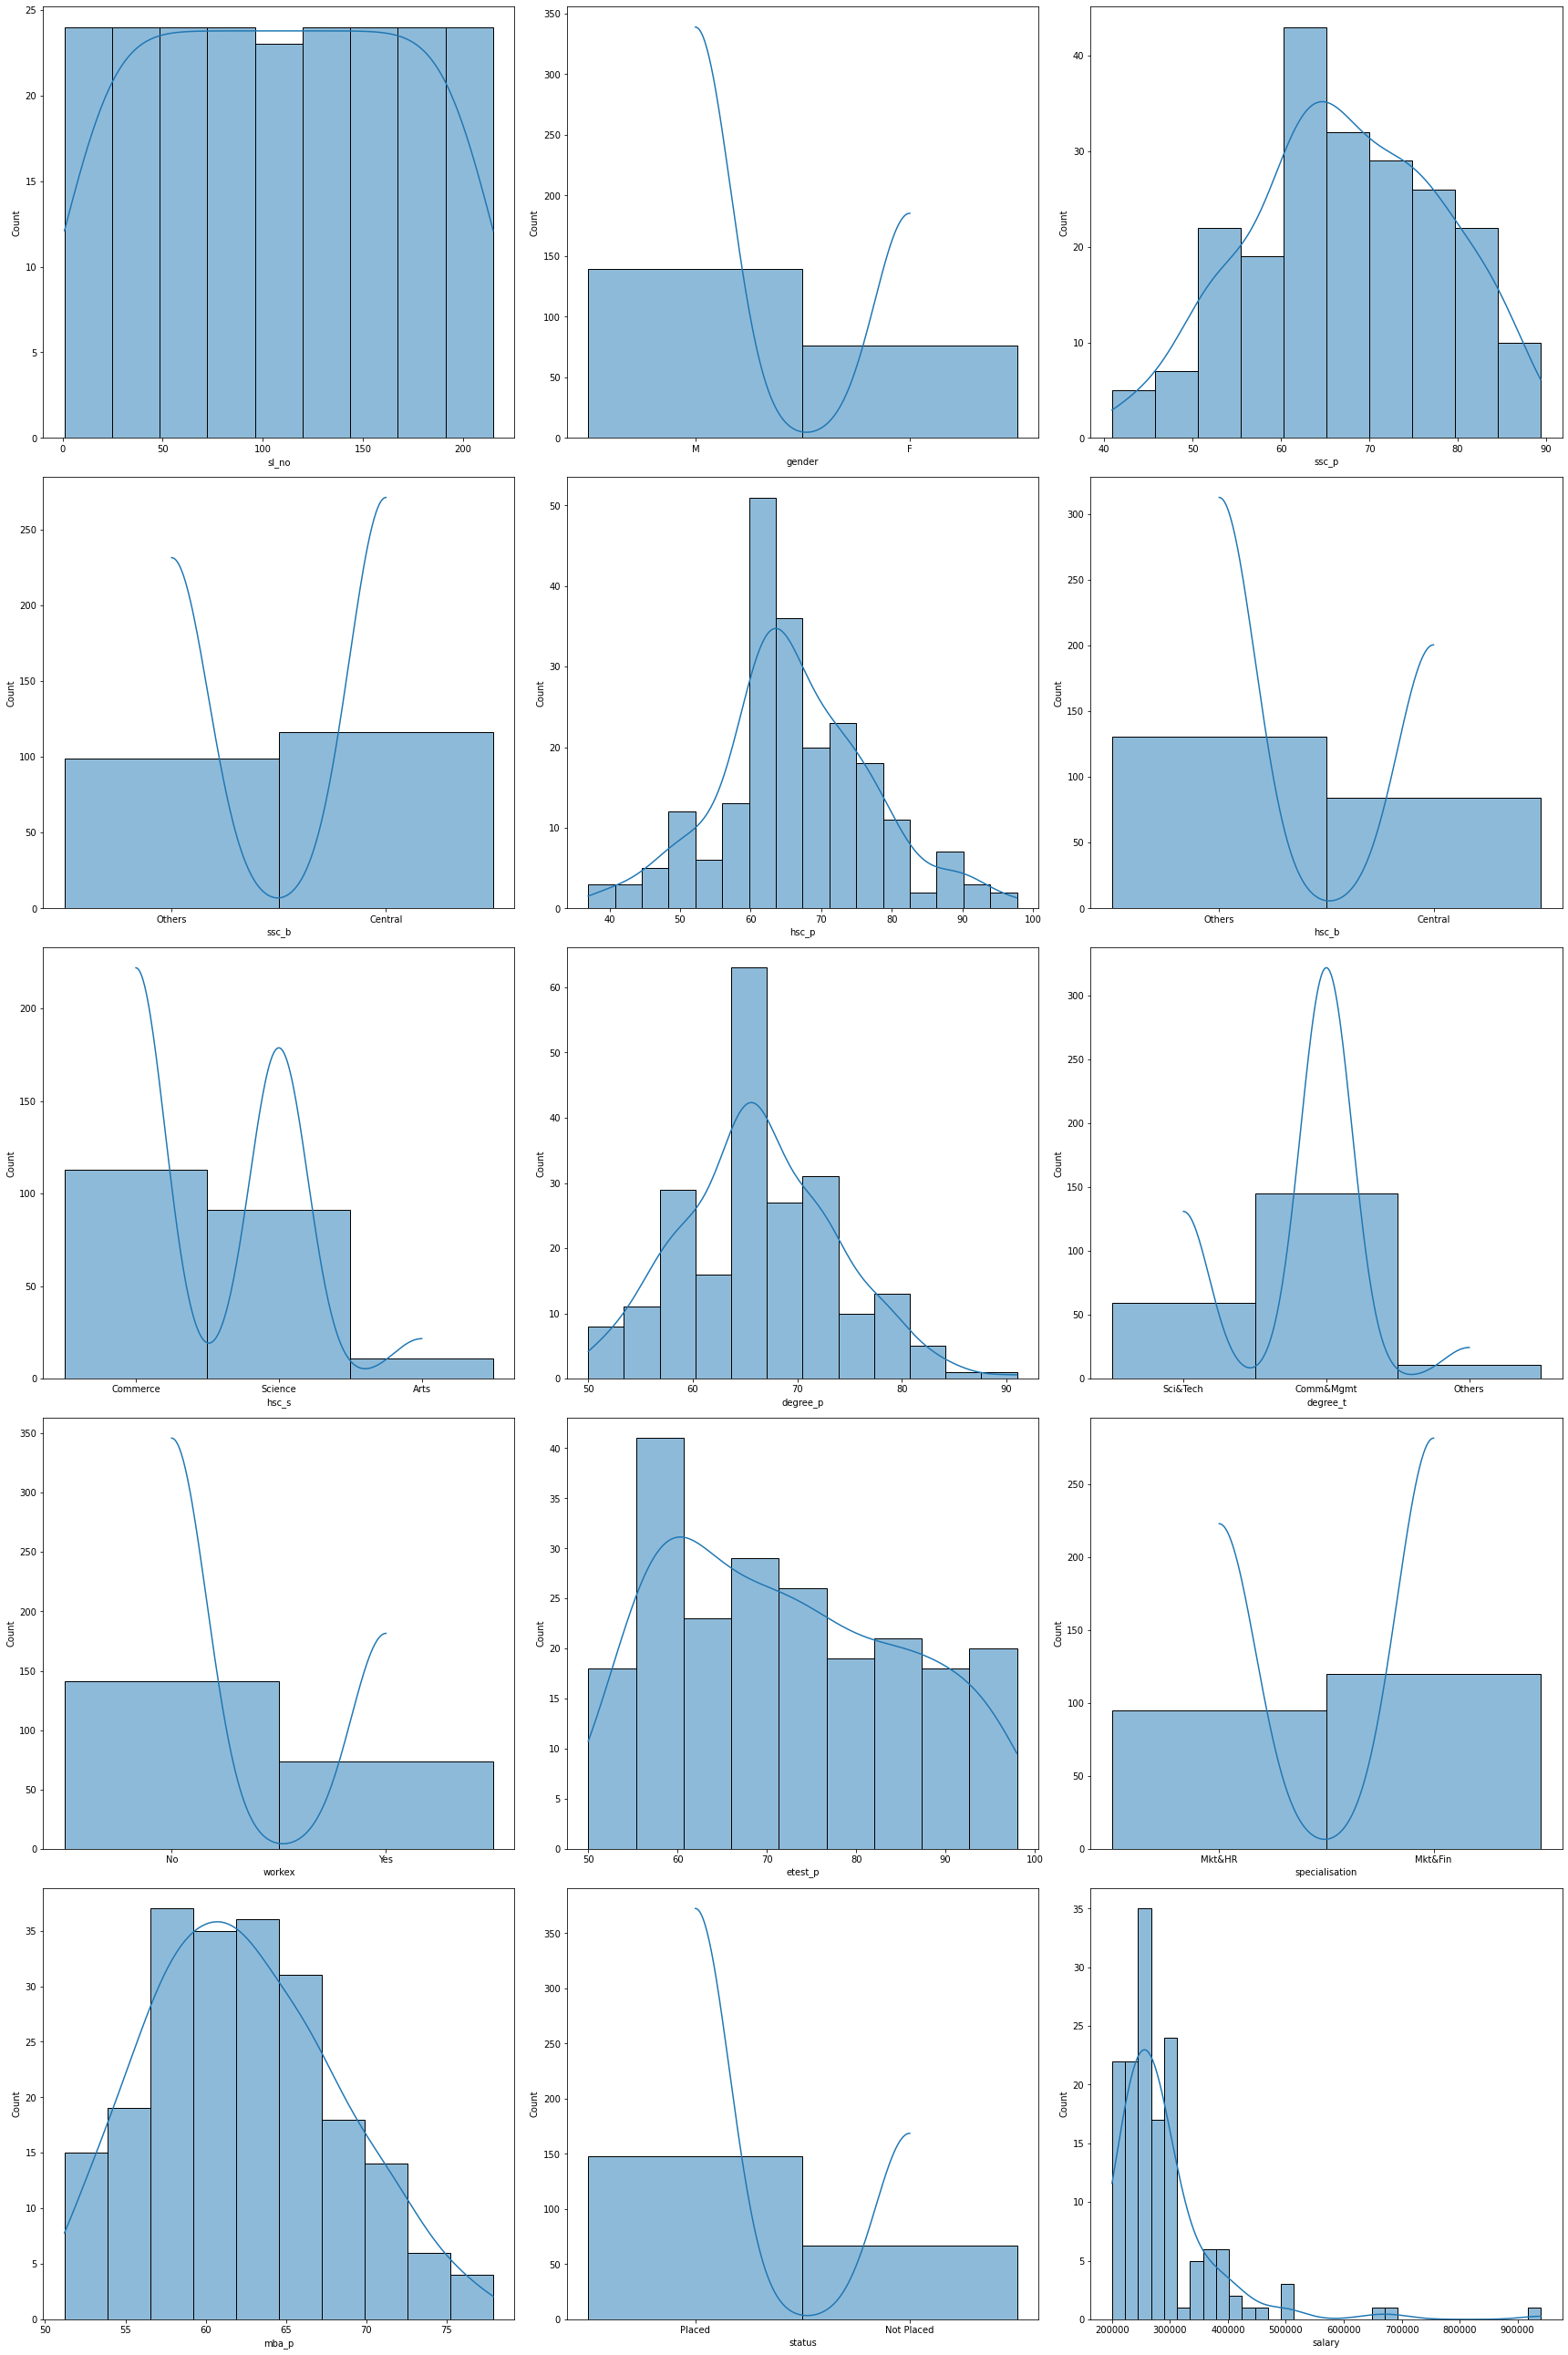

In [250]:
plt.figure(figsize=(24,36))
plt.subplots_adjust(hspace=0.5)
i = 1
for col_name in df.columns:
    plt.subplot(5,3, i)
    sns.histplot(data=df, x=col_name, kde=True,  multiple='layer', alpha=0.5, palette='viridis')
    i += 1
plt.tight_layout()

## Pairplot

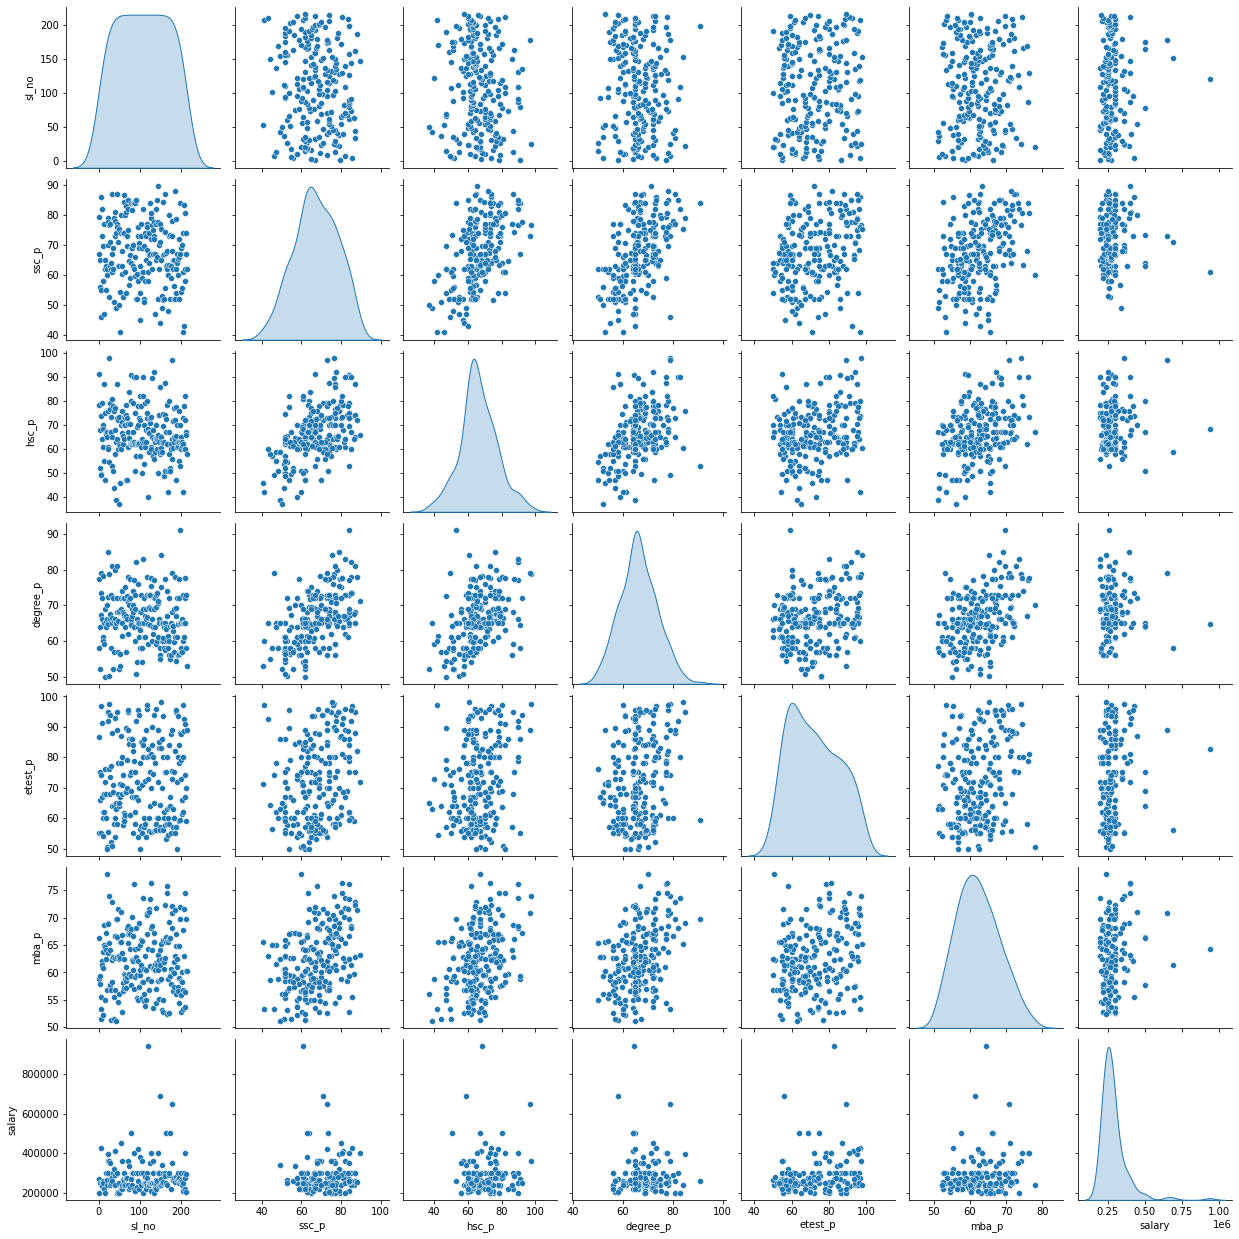

In [251]:
sns.pairplot(df,diag_kind = 'kde',kind = 'scatter',palette = 'husl')

# Data Cleaning

In [252]:
df=df.drop('sl_no',axis=1)

On analysis of data it is evident that only null values in data is for the case when the student didn't get placed.

In [253]:
df=df.fillna(0)

In [254]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


## Data Encoding

Two types of encoding is used-

    1)Label encoding (for features with only two classes)

    2)One-hot encoding (for features with more then two classes)

In [255]:
col_enc = ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']
Ocol=[]
Lcol=[]
for i in col_enc:
    if len(df[i].value_counts())>2:
        Ocol.append(i)
    else:
        Lcol.append(i)
print(Ocol,Lcol)

['hsc_s', 'degree_t'] ['gender', 'ssc_b', 'hsc_b', 'workex', 'specialisation', 'status']


In [256]:
from sklearn.preprocessing import OneHotEncoder#pd.get_dummies
from sklearn.preprocessing import LabelEncoder

Oenc = OneHotEncoder(sparse=False)
columns_to_one_hot = Ocol
encoded_array = Oenc.fit_transform(df.loc[:,columns_to_one_hot])
df_encoded = pd.DataFrame(encoded_array,columns=Oenc.get_feature_names_out() )
df = pd.concat([df,df_encoded],axis=1)
df.drop(labels= columns_to_one_hot,axis=1,inplace=True)
df

Lenc=[]
for i in range(len(Lcol)):
    Lenc.append(LabelEncoder())
    df[Lcol[i]]= Lenc[i].fit_transform(df[Lcol[i]])

In [257]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,270000.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,200000.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,250000.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,425000.0,0.0,1.0,0.0,1.0,0.0,0.0


## Outliers

In [258]:
from scipy import stats

z= np.abs(stats.zscore(df))
print(df.shape)

(215, 18)


In [259]:
df=df[(np.abs(stats.zscore(df))<2.5).all(axis=1)]
df.shape

(191, 18)

In [260]:
df.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.0,191.000000,191.000000,191.000000,191.0,191.000000
mean,0.664921,67.635969,0.460733,66.542775,0.633508,66.442775,0.335079,72.019215,0.450262,62.072565,0.696335,194104.712042,0.0,0.570681,0.429319,0.706806,0.0,0.293194
std,0.473258,10.672002,0.499766,10.286627,0.483112,6.922188,0.473258,13.355235,0.498828,5.708578,0.461048,138706.541905,0.0,0.496280,0.496280,0.456423,0.0,0.456423
min,0.000000,40.890000,0.000000,40.000000,0.000000,50.000000,0.000000,50.000000,0.000000,51.290000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,61.000000,0.000000,61.000000,0.000000,61.130000,0.000000,60.000000,0.000000,57.670000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.000000,67.000000,0.000000,65.000000,1.000000,66.000000,0.000000,70.000000,0.000000,62.000000,1.000000,240000.000000,0.0,1.000000,0.000000,1.000000,0.0,0.000000
75%,1.000000,76.000000,1.000000,73.100000,1.000000,72.000000,1.000000,84.000000,1.000000,66.050000,1.000000,280000.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000
max,1.000000,89.400000,1.000000,92.000000,1.000000,84.000000,1.000000,98.000000,1.000000,76.260000,1.000000,500000.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000


Notice that all the from Arts student 'hsc_s_Arts' and 'degree_t_Others' are removed from thr dataframe so we remove these columns.

In [261]:
df=df.drop(['hsc_s_Arts','degree_t_Others'],axis=1)

## Skewness

In [262]:
df.columns.shape

(16,)

/home/priyanshu/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/priyanshu/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/priyanshu/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

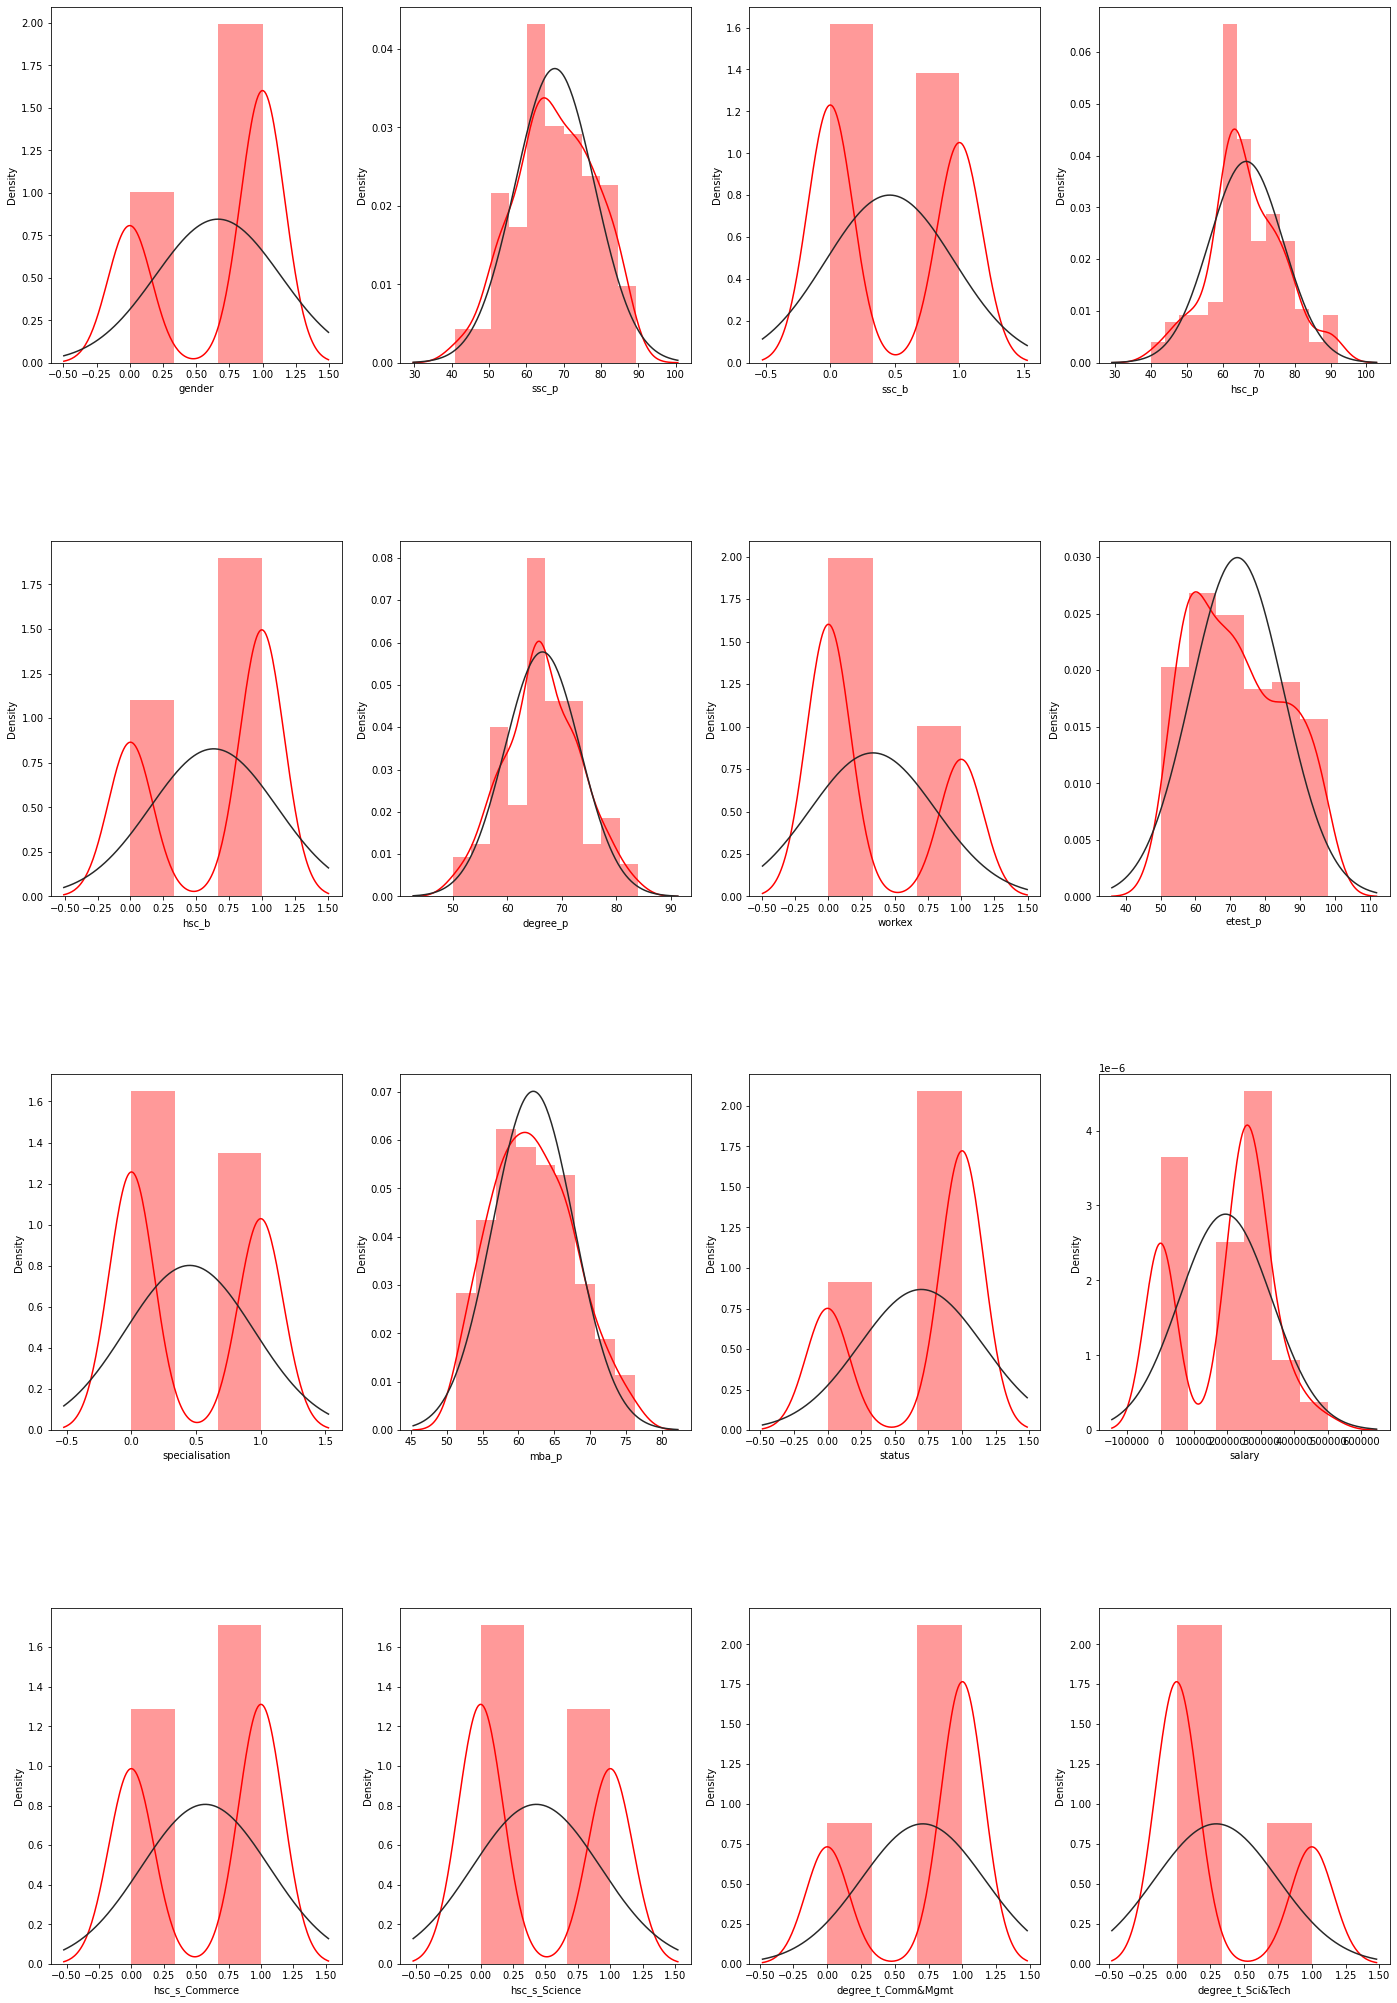

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew

plt.figure(figsize=(24,36))
plt.subplots_adjust(hspace=0.5)
i = 1
for col_name in df.columns:
    plt.subplot(4,4, i)
    sns.distplot(df[col_name],fit=norm,color='r')
    i += 1
plt.show()

In [264]:
from scipy.stats import skew
print("Skewness scores for all columns:")
for column in df.columns:
    print(f"{column} : {skew(df[column])}")

Skewness scores for all columns:
gender : -0.6987932511651894
ssc_p : -0.14571911690839878
ssc_b : 0.15755468096308775
hsc_p : 0.12363304712183101
hsc_b : -0.5541514461459456
degree_p : 0.04944479459367809
workex : 0.6987932511651901
etest_p : 0.29333654529856235
specialisation : 0.19994462134740867
mba_p : 0.2812108825004616
status : -0.8539283774648626
salary : -0.32292483630097957
hsc_s_Commerce : -0.28559038965724687
hsc_s_Science : 0.28559038965724687
degree_t_Comm&Mgmt : -0.9085863198007667
degree_t_Sci&Tech : 0.9085863198007667


From both data and graphs it is evident that the none of the data is highly skrewed 

### Dividing data for Classification and Regression

In [265]:
df_R=df[(df["salary"]!=0)]
y_R=df_R["salary"]
y_C=df["status"].copy()
x_C=df.drop(["status","salary"],axis=1)
x_R=df_R.drop(["salary","status"],axis=1)

In [266]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_C = pd.DataFrame(scaler.fit_transform(x_C),columns=x_C.columns)
x_R = pd.DataFrame(scaler.fit_transform(x_R),columns=x_R.columns)

In [267]:
df_R=x_R.copy()
df_R["salary"]=y_R.values
df_C=x_C.copy()
df_C["status"]=y_C.values

# Grid search function

Code to simplify Grid search to be used later-

In [268]:
from sklearn.model_selection import GridSearchCV
def Grid_search(model,parameters):
    models= GridSearchCV(model, parameters)
    models.fit(x_train,y_train)

    result=models.cv_results_
    params=parameters.keys()
    best=np.where(result['rank_test_score']==1)[0][0]
    best_parameters=parameters.copy()
    for param in params:
        best_parameters[param]=result["param_"+param][best]
    return best_parameters

# Regression

In [269]:
y_R

0      270000.0
1      200000.0
4      425000.0
7      252000.0
8      231000.0
         ...   
209    216000.0
210    400000.0
211    275000.0
212    295000.0
213    204000.0
Name: salary, Length: 133, dtype: float64

In [270]:
x_R

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Sci&Tech
0,1.0,0.445545,1.0,0.975710,1.0,0.071429,0.0,0.104167,1.0,0.268844,1.0,0.0,0.0,1.0
1,1.0,0.750743,0.0,0.667962,1.0,0.767143,1.0,0.760417,0.0,0.582077,0.0,1.0,0.0,1.0
2,1.0,0.910891,0.0,0.553073,0.0,0.617857,0.0,0.975000,0.0,0.130653,1.0,0.0,1.0,0.0
3,1.0,0.816832,0.0,0.319893,0.0,0.357143,1.0,0.354167,0.0,0.408710,0.0,1.0,0.0,1.0
4,1.0,0.594059,0.0,0.684236,0.0,0.571429,0.0,0.861250,0.0,0.373116,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1.0,0.321782,0.0,0.514209,0.0,0.321429,0.0,0.354167,0.0,0.172111,1.0,0.0,1.0,0.0
129,1.0,0.782178,1.0,0.757105,1.0,0.771429,0.0,0.854167,0.0,0.925879,1.0,0.0,1.0,0.0
130,1.0,0.222772,1.0,0.222735,1.0,0.571429,0.0,0.500000,0.0,0.051926,0.0,1.0,0.0,1.0
131,1.0,0.445545,1.0,0.392762,1.0,0.607143,1.0,0.187500,0.0,0.726131,1.0,0.0,1.0,0.0


In [271]:
df_R

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Sci&Tech,salary
0,1.0,0.445545,1.0,0.975710,1.0,0.071429,0.0,0.104167,1.0,0.268844,1.0,0.0,0.0,1.0,270000.0
1,1.0,0.750743,0.0,0.667962,1.0,0.767143,1.0,0.760417,0.0,0.582077,0.0,1.0,0.0,1.0,200000.0
2,1.0,0.910891,0.0,0.553073,0.0,0.617857,0.0,0.975000,0.0,0.130653,1.0,0.0,1.0,0.0,425000.0
3,1.0,0.816832,0.0,0.319893,0.0,0.357143,1.0,0.354167,0.0,0.408710,0.0,1.0,0.0,1.0,252000.0
4,1.0,0.594059,0.0,0.684236,0.0,0.571429,0.0,0.861250,0.0,0.373116,1.0,0.0,1.0,0.0,231000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1.0,0.321782,0.0,0.514209,0.0,0.321429,0.0,0.354167,0.0,0.172111,1.0,0.0,1.0,0.0,216000.0
129,1.0,0.782178,1.0,0.757105,1.0,0.771429,0.0,0.854167,0.0,0.925879,1.0,0.0,1.0,0.0,400000.0
130,1.0,0.222772,1.0,0.222735,1.0,0.571429,0.0,0.500000,0.0,0.051926,0.0,1.0,0.0,1.0,275000.0
131,1.0,0.445545,1.0,0.392762,1.0,0.607143,1.0,0.187500,0.0,0.726131,1.0,0.0,1.0,0.0,295000.0


Feature Selction

In [272]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

We fit a basic linear regression to rate different selctions

In [273]:
def feature_selection(variable_counts,func):
    test=SelectKBest(score_func=func,k=variable_counts)
    fit=test.fit(x_R,y_R)
    feature_selected=x_R.columns[fit.get_support()]
    X_sel = fit.transform(x_R)
    
    reg=LinearRegression()
    reg.fit(X_sel,y_R)
    y_pred=reg.predict(x_R[feature_selected])
    return  mean_squared_error(y_R,y_pred)

In [274]:
error_t = pd.DataFrame({'features count':[],'error':[],'func name' : []})
function_list =[chi2, f_classif, mutual_info_classif]
function_name =['chi2', 'f_classif', 'mutual_info_classif']
k=0
for j in function_list:
    for i in range(1,len(df_R.columns)):
        error= feature_selection(i,j)
        error_t=error_t.append({'features count': i,'error':error,'func name' : function_name[k]},ignore_index=True)
    k+=1
error_t

/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/tmp/ipykernel_1222/681591706.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  error_t=error_t.append({'features count': i,'error':error,'func name' : function_name[k]},ignore_index=True)
/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/tmp/ipykernel_1222/681591706.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  error_t=error_t.append({'features count': i,'error':error,'func name' : function_name[k]},ignore_index=True)
/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/base.py:443: Us

,features count,error,func name
0,1.0,3.614417e+09,chi2
1,2.0,3.572186e+09,chi2
2,3.0,3.536481e+09,chi2
3,4.0,3.500829e+09,chi2
4,5.0,3.499414e+09,chi2
5,6.0,3.499414e+09,chi2
6,7.0,3.568036e+09,chi2
7,8.0,3.295745e+09,chi2
8,9.0,3.295745e+09,chi2
9,10.0,3.088925e+09,chi2


<AxesSubplot:xlabel='features count', ylabel='error'>

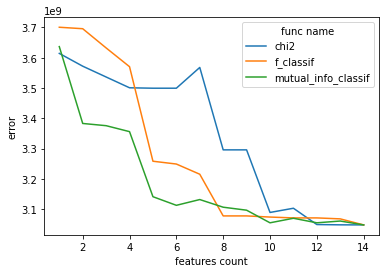

In [275]:
sns.lineplot(data=error_t,x='features count',y='error',hue='func name')

Graph suggests 13 featueres are enough.

Now we need to choose the best 13 features

              features     scores
13   degree_t_Sci&Tech  29.133333
2                ssc_b  21.821615
11       hsc_s_Science  21.423611
8       specialisation  20.235289
6               workex  18.331845
10      hsc_s_Commerce  16.067708
4                hsc_b  13.863333
0               gender  13.101551
12  degree_t_Comm&Mgmt  11.653333
9                mba_p   7.823839
7              etest_p   7.583089
5             degree_p   4.833079
1                ssc_p   4.530036
3                hsc_p   4.239740
AxesSubplot(0.125,0.125;0.775x0.755)
              features    scores
9                mba_p  1.748822
1                ssc_p  1.669852
5             degree_p  1.390878
7              etest_p  1.244292
0               gender  1.206333
3                hsc_p  1.120570
2                ssc_b  1.102966
13   degree_t_Sci&Tech  1.054734
12  degree_t_Comm&Mgmt  1.054734
4                hsc_b  0.968423
11       hsc_s_Science  0.936065
10      hsc_s_Commerce  0.936065
8       specialisation  

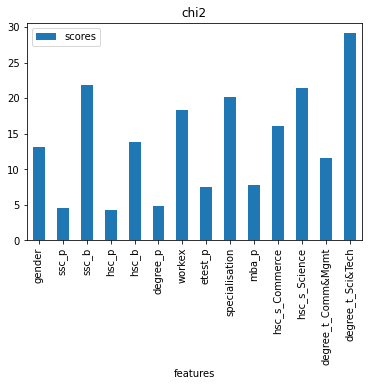

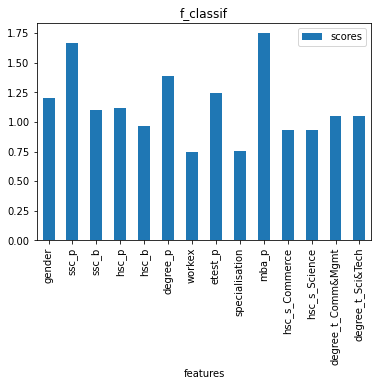

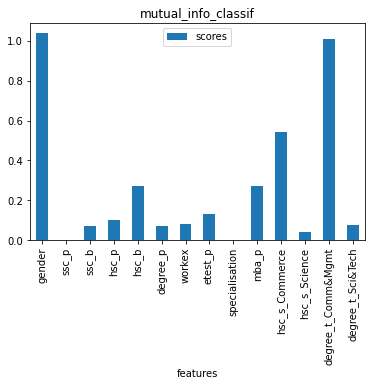

In [276]:
k=0
for i in function_list:
    test=SelectKBest(score_func=i,k=13).fit(x_R,y_R)
    s=pd.DataFrame({'features':x_R.columns.values,'scores' : test.scores_})
    print(s.sort_values(by=['scores'],ascending=False))
    print(s.plot(x='features',kind='bar',title= function_name[k]))
    k+=1

Drop degree_t_Sci&Tech

In [277]:
df_temp=df_R.copy()

In [278]:
df_R

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Sci&Tech,salary
0,1.0,0.445545,1.0,0.975710,1.0,0.071429,0.0,0.104167,1.0,0.268844,1.0,0.0,0.0,1.0,270000.0
1,1.0,0.750743,0.0,0.667962,1.0,0.767143,1.0,0.760417,0.0,0.582077,0.0,1.0,0.0,1.0,200000.0
2,1.0,0.910891,0.0,0.553073,0.0,0.617857,0.0,0.975000,0.0,0.130653,1.0,0.0,1.0,0.0,425000.0
3,1.0,0.816832,0.0,0.319893,0.0,0.357143,1.0,0.354167,0.0,0.408710,0.0,1.0,0.0,1.0,252000.0
4,1.0,0.594059,0.0,0.684236,0.0,0.571429,0.0,0.861250,0.0,0.373116,1.0,0.0,1.0,0.0,231000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1.0,0.321782,0.0,0.514209,0.0,0.321429,0.0,0.354167,0.0,0.172111,1.0,0.0,1.0,0.0,216000.0
129,1.0,0.782178,1.0,0.757105,1.0,0.771429,0.0,0.854167,0.0,0.925879,1.0,0.0,1.0,0.0,400000.0
130,1.0,0.222772,1.0,0.222735,1.0,0.571429,0.0,0.500000,0.0,0.051926,0.0,1.0,0.0,1.0,275000.0
131,1.0,0.445545,1.0,0.392762,1.0,0.607143,1.0,0.187500,0.0,0.726131,1.0,0.0,1.0,0.0,295000.0


In [279]:
df_R=df_temp.copy()
df_R=df_R.drop(['ssc_b'],axis=1)

In [280]:
df_R

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Sci&Tech,salary
0,1.0,0.445545,1.0,0.975710,1.0,0.071429,0.0,0.104167,1.0,0.268844,1.0,0.0,0.0,1.0,270000.0
1,1.0,0.750743,0.0,0.667962,1.0,0.767143,1.0,0.760417,0.0,0.582077,0.0,1.0,0.0,1.0,200000.0
2,1.0,0.910891,0.0,0.553073,0.0,0.617857,0.0,0.975000,0.0,0.130653,1.0,0.0,1.0,0.0,425000.0
3,1.0,0.816832,0.0,0.319893,0.0,0.357143,1.0,0.354167,0.0,0.408710,0.0,1.0,0.0,1.0,252000.0
4,1.0,0.594059,0.0,0.684236,0.0,0.571429,0.0,0.861250,0.0,0.373116,1.0,0.0,1.0,0.0,231000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1.0,0.321782,0.0,0.514209,0.0,0.321429,0.0,0.354167,0.0,0.172111,1.0,0.0,1.0,0.0,216000.0
129,1.0,0.782178,1.0,0.757105,1.0,0.771429,0.0,0.854167,0.0,0.925879,1.0,0.0,1.0,0.0,400000.0
130,1.0,0.222772,1.0,0.222735,1.0,0.571429,0.0,0.500000,0.0,0.051926,0.0,1.0,0.0,1.0,275000.0
131,1.0,0.445545,1.0,0.392762,1.0,0.607143,1.0,0.187500,0.0,0.726131,1.0,0.0,1.0,0.0,295000.0


In [315]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_R.drop(["salary"],axis=1),df_R["salary"],test_size = 0.3)

In [316]:
x_train

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Sci&Tech
40,1.0,0.841584,1.0,0.562788,1.0,0.357143,0.0,0.394167,1.0,0.254606,0.0,1.0,1.0,0.0
20,0.0,0.742574,0.0,0.611368,0.0,0.342857,0.0,0.166667,1.0,0.129397,0.0,1.0,0.0,1.0
102,1.0,0.871287,0.0,0.451057,0.0,0.321429,1.0,0.625000,1.0,0.014238,0.0,1.0,0.0,1.0
120,1.0,0.569307,1.0,0.295604,1.0,0.767857,1.0,0.583333,0.0,0.087940,0.0,1.0,0.0,1.0
86,1.0,0.594059,0.0,0.319893,1.0,0.750000,1.0,0.312500,1.0,0.360134,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,1.0,0.346535,1.0,0.499636,1.0,0.192857,0.0,0.375000,0.0,0.607203,1.0,0.0,1.0,0.0
73,1.0,0.396040,0.0,0.417051,1.0,0.464286,0.0,0.077083,1.0,0.110134,0.0,1.0,1.0,0.0
17,0.0,0.297030,0.0,0.732815,0.0,0.371429,0.0,0.018542,1.0,0.411642,1.0,0.0,1.0,0.0
66,1.0,0.594059,0.0,0.659947,0.0,0.607143,1.0,0.729167,1.0,0.563233,0.0,1.0,0.0,1.0


In [317]:
#linear regression , knn, decision tree
y_test.to_numpy().reshape(-1, 1);

In [318]:
#Linear regression
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.2840693988335572

In [319]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
parameters = {'algorithm':('ball_tree', 'kd_tree', 'brute'),'n_neighbors': [i for i in range(1,30)]}
best_parameters= Grid_search(model, parameters)
model = KNeighborsRegressor(algorithm=best_parameters["algorithm"],n_neighbors=best_parameters["n_neighbors"])
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.11261760863449843

In [320]:
##decision tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
model = DecisionTreeRegressor()
parameters = {'criterion':["squared_error", "friedman_mse", "absolute_error", "poisson"],'splitter':["best", "random"],'max_depth': [i for i in range(1,10)]+[None] ,'max_features':['sqrt', 'log2']+[None],'ccp_alpha': [i for i in range(0,10)]}
best_parameters= Grid_search(model, parameters)
model=DecisionTreeRegressor(criterion=best_parameters["criterion"],splitter=best_parameters["splitter"],max_depth=best_parameters["max_depth"],max_features=best_parameters["max_features"],ccp_alpha=best_parameters["ccp_alpha"])
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.0862386311311415

In [321]:
from sklearn.svm import SVR
model=SVR()
parameters = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[i for i in range(1,5)],'coef0':[i for i in range(0,5)],'C':[i for i in range(1,10)]}
best_parameters= Grid_search(model, parameters)
model=SVR(kernel=best_parameters["kernel"],C=best_parameters["C"],degree=best_parameters["degree"],coef0=best_parameters["coef0"])
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.006206647783510322

# Classification

In [322]:
df_C

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Commerce,degree_t_Comm&Mgmt,degree_t_Sci&Tech,status
0,1.0,0.538240,0.980769,0.235294,0.0,0.104167,1.0,0.300761,1.0,0.0,1.0,1
1,1.0,0.792414,0.737115,0.808235,1.0,0.760417,0.0,0.600320,0.0,0.0,1.0,1
2,1.0,0.311482,0.230769,0.058824,0.0,0.333333,1.0,0.325991,0.0,0.0,1.0,0
3,1.0,0.925788,0.646154,0.685294,0.0,0.975000,0.0,0.168602,1.0,1.0,0.0,1
4,1.0,0.290868,0.188462,0.507353,1.0,0.104167,0.0,0.011614,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
186,1.0,0.818594,0.807692,0.811765,0.0,0.854167,0.0,0.929115,1.0,1.0,0.0,1
187,1.0,0.352711,0.384615,0.647059,0.0,0.500000,0.0,0.093312,0.0,0.0,1.0,1
188,1.0,0.538240,0.519231,0.676471,1.0,0.187500,0.0,0.738086,1.0,1.0,0.0,1
189,0.0,0.682540,0.500000,0.235294,0.0,0.416667,1.0,0.358030,1.0,1.0,0.0,1


In [323]:
from sklearn.linear_model import LogisticRegression
def feature_selection(variable_counts,func):
    test=SelectKBest(score_func=func,k=variable_counts)
    fit=test.fit(x_C,y_C)
    feature_selected=x_C.columns[fit.get_support()]
    X_sel = fit.transform(x_C)
    
    reg=LogisticRegression()
    reg.fit(X_sel,y_C)
    y_pred=reg.predict(x_C[feature_selected])
    return  mean_squared_error(y_C,y_pred)


In [324]:
error_t = pd.DataFrame({'features count':[],'error':[],'func name' : []})
function_list =[chi2, f_classif, mutual_info_classif]
function_name =['chi2', 'f_classif', 'mutual_info_classif']
k=0 

for j in function_list:
    for i in range(1,len(df_C.columns)):
        error= feature_selection(i,j)
        error_t=error_t.append({'features count': i,'error':error,'func name' : function_name[k]},ignore_index=True)
    k+=1
error_t

/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/tmp/ipykernel_1222/3570060494.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  error_t=error_t.append({'features count': i,'error':error,'func name' : function_name[k]},ignore_index=True)
/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/tmp/ipykernel_1222/3570060494.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  error_t=error_t.append({'features count': i,'error':error,'func name' : function_name[k]},ignore_index=True)
/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/base.py:4

,features count,error,func name
0,1.0,0.303665,chi2
1,2.0,0.303665,chi2
2,3.0,0.183246,chi2
3,4.0,0.151832,chi2
4,5.0,0.151832,chi2
5,6.0,0.141361,chi2
6,7.0,0.141361,chi2
7,8.0,0.130890,chi2
8,9.0,0.120419,chi2
9,10.0,0.109948,chi2


<AxesSubplot:xlabel='features count', ylabel='error'>

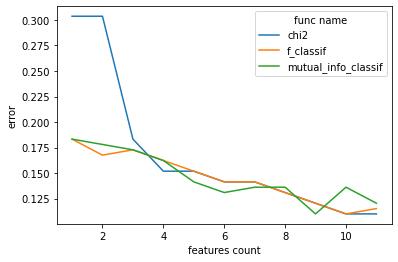

In [325]:
sns.lineplot(data=error_t,x='features count',y='error',hue='func name')

              features    scores
6               workex  9.661525
8       specialisation  6.515247
1                ssc_p  5.773599
5             degree_p  3.691187
3                hsc_p  3.270552
0               gender  1.153409
7              etest_p  0.537088
2                ssc_b  0.398331
13   degree_t_Sci&Tech  0.083568
12  degree_t_Comm&Mgmt  0.034665
4                hsc_b  0.021603
9                mba_p  0.012651
11       hsc_s_Science  0.000571
10      hsc_s_Commerce  0.000429
AxesSubplot(0.125,0.125;0.775x0.755)
              features      scores
1                ssc_p  100.066456
5             degree_p   55.395236
3                hsc_p   54.722640
6               workex   15.562058
8       specialisation   12.503273
0               gender    3.468672
7              etest_p    3.219807
2                ssc_b    0.733756
13   degree_t_Sci&Tech    0.117068
12  degree_t_Comm&Mgmt    0.117068
9                mba_p    0.104028
4                hsc_b    0.058346
10      hsc_s

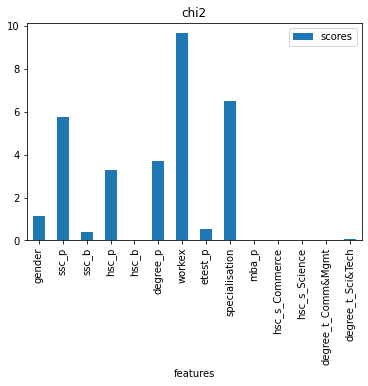

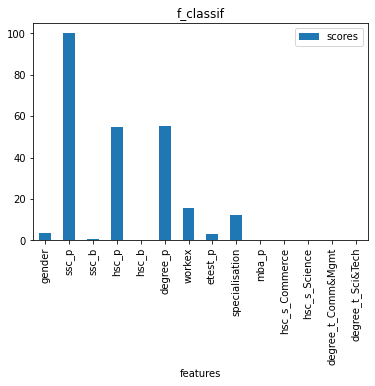

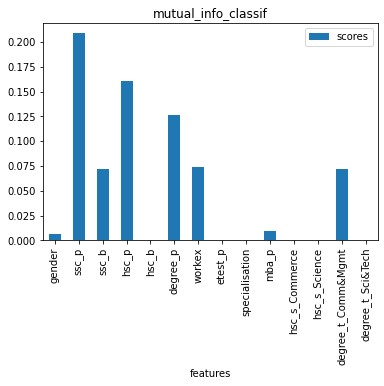

In [326]:
k=0
for i in function_list:
    test=SelectKBest(score_func=i,k=11).fit(x_C,y_C)
    s=pd.DataFrame({'features':x_C.columns.values,'scores' : test.scores_})
    print(s.sort_values(by=['scores'],ascending=False))
    print(s.plot(x='features',kind='bar',title= function_name[k]))
    k+=1

In [334]:
df_C=df_C.drop(['ssc_b','hsc_b','hsc_s_Science'],axis=1)

KeyError: "['ssc_b', 'hsc_b', 'hsc_s_Science'] not found in axis"

In [328]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_C.drop(["status"],axis=1),df_C["status"],test_size = 0.3)

### Confusion Matrix

In [335]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns

# To compute the F1 score, simply call the f1_score() function:
from sklearn.metrics import f1_score

def eval(y_pred, y_test):
    cm = confusion_matrix(y_pred, y_test)
    plt.figure(figsize=(12,12))
    sns.heatmap(cm/len(y_pred), annot=True, fmt='.2%', cmap='Blues') 
    plt.show()
    print("f1_core-",f1_score(y_pred, y_test))

0.8620689655172413
[[10  1]
 [ 7 40]]
0.9090909090909092


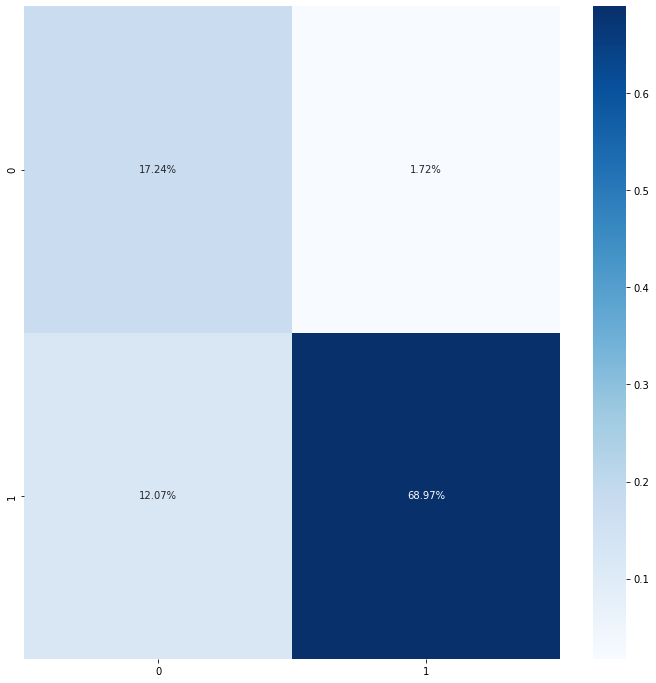

In [340]:
#Logistic regression
model=LogisticRegression()
parameters = {'penalty':['l2'],'C':[i for i in range(1,100)]}
best_parameters= Grid_search(model, parameters)
model=LogisticRegression(penalty=best_parameters["penalty"],C=best_parameters["C"])
model.fit(x_train,y_train)
print(model.score(x_test,y_test))
eval(model.predict(x_test), y_test)

/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

0.7241379310344828
[[ 8  7]
 [ 9 34]]
0.8095238095238095


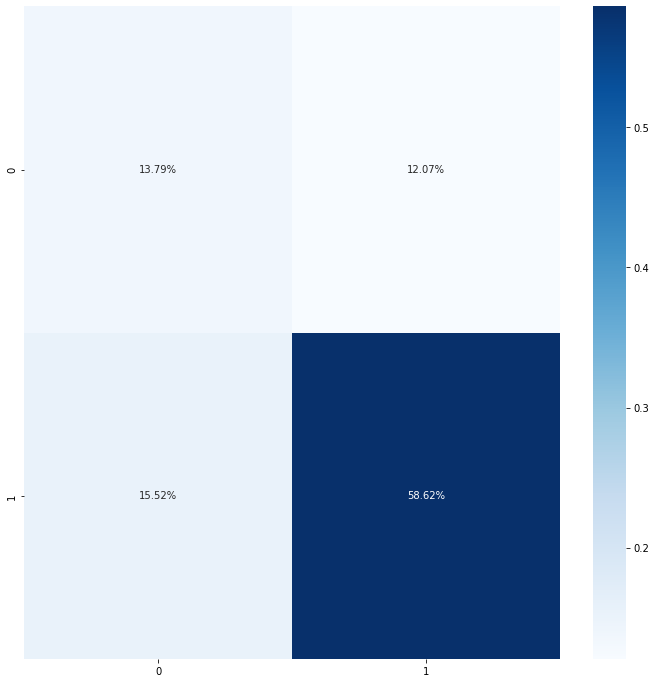

In [341]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
parameters = {'algorithm':('ball_tree', 'kd_tree', 'brute'),'n_neighbors': [i for i in range(1,30)]}
best_parameters= Grid_search(model, parameters)
model = KNeighborsClassifier(algorithm=best_parameters["algorithm"],n_neighbors=best_parameters["n_neighbors"])
model.fit(x_train,y_train)
print(model.score(x_test,y_test))
eval(model.predict(x_test), y_test)

0.7931034482758621
[[11  6]
 [ 6 35]]
0.8536585365853658


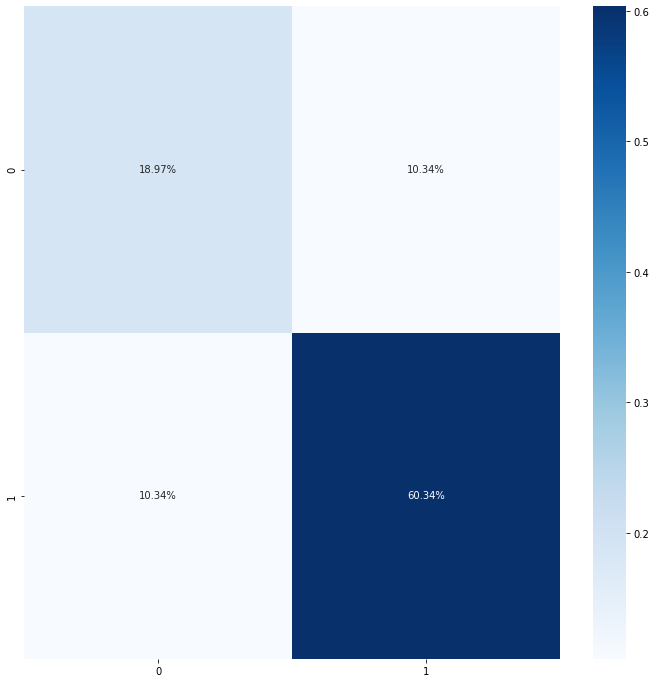

In [342]:
##decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier()
parameters = {'criterion':("gini", "entropy", "log_loss"), 'splitter':["best", "random"],'max_depth': [i for i in range(1,10)]+[None] ,'max_features':['sqrt', 'log2']+[None],'ccp_alpha': [i for i in range(0,10)]}
best_parameters= Grid_search(model, parameters)
model=DecisionTreeClassifier(criterion=best_parameters["criterion"],splitter=best_parameters["splitter"],max_depth=best_parameters["max_depth"],max_features=best_parameters["max_features"],ccp_alpha=best_parameters["ccp_alpha"])
model.fit(x_train,y_train)
print(model.score(x_test,y_test))
eval(model.predict(x_test), y_test)

0.8275862068965517
[[12  5]
 [ 5 36]]
0.8780487804878049


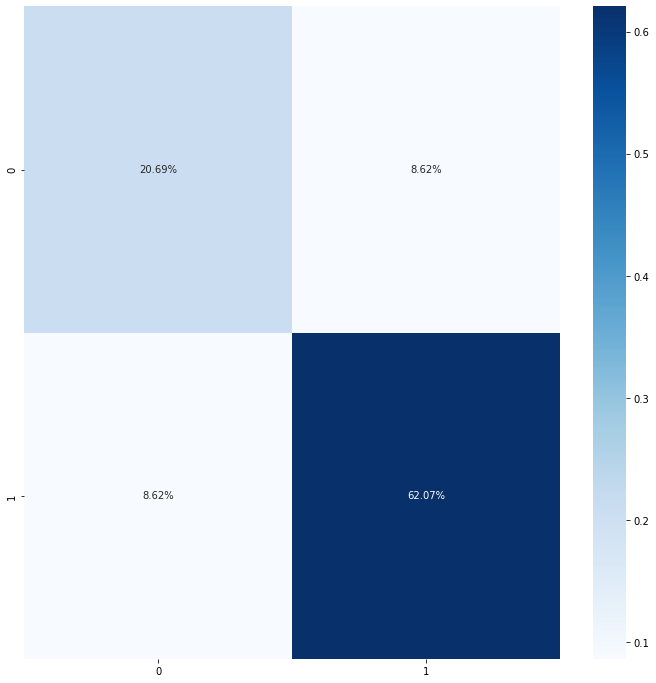

In [343]:
#SVM
from sklearn.svm import SVC
parameters = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C':[i for i in range(1,10)]}
model=SVC()
best_parameters= Grid_search(model, parameters)
model=SVC(kernel=best_parameters['kernel'],C=best_parameters["C"])
model.fit(x_train,y_train)
print(model.score(x_test,y_test))
eval(model.predict(x_test), y_test)